In [7]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

#### Load the env with non-slippery frozen lakes tiles

In [8]:
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")
env.reset()
print(env.render())


SFFF
FHFH
FFFH
HFFG



We will use a Q-Table, where rows list every state "s" and columns avery every action "a" for each state "s". each cell contains a value Q(s, a)  
which is the quality fo the action "a" in the state "s". 1 if it's the best possible action, 0 if really bad.
When the agent is in a particular state s, it just has to check the Q-Table to see which action has the highest value.
![image](./assets/Q-Table.png)  
Let's create our Q-Table and fill it with zeros since we still have no idea of the value of each action in each state

In [9]:
# Create the qtable with the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)
# We use the env.observation_space to get the number of states
# and the number of actions
nb_states = env.observation_space.n
nb_actions = env.action_space.n
qtable = np.zeros((nb_states, nb_actions))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


#### We can use env.action_space.sample() to get a random action :

In [10]:
env.step(env.action_space.sample())
print(env.render())

  (Left)
SFFF
FHFH
FFFH
HFFG



#### Steps we must reproduce to train the model :  
The backpropagation formula is :  
Qnew(st,at)=Q(st,at)+α⋅(rt+γ⋅max aQ(st+1,a)−Q(st,at))
where :  
Q(st,at) = quality of a given action for a given state  
rt = 1/ the reward for the next state  
α = learning rate (between 0 and 1)
γ = discount factor (between 0 and 1) -> If γ = 0, immediate rewards, if γ = 1, any potential future reward has the same value than the current one

1. Choose random action if all actions for current state == 0  
2. Implementing the action with step(action)  
3. Updating the value of the original state with the action we took, using info about the new state and reward given by step(action)  
We keep repeating these action until agent get stuck on a hole or reach the goal

#### Let's define global useful variables

In [11]:
env.reset()
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# Hyperparameters
episodes = 1000
alpha = 0.5
gamma = 0.9

# List of outcomes to plot
outcomes = []

#### Training

[[0.      0.      0.59049 0.     ]
 [0.      0.      0.6561  0.     ]
 [0.      0.729   0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


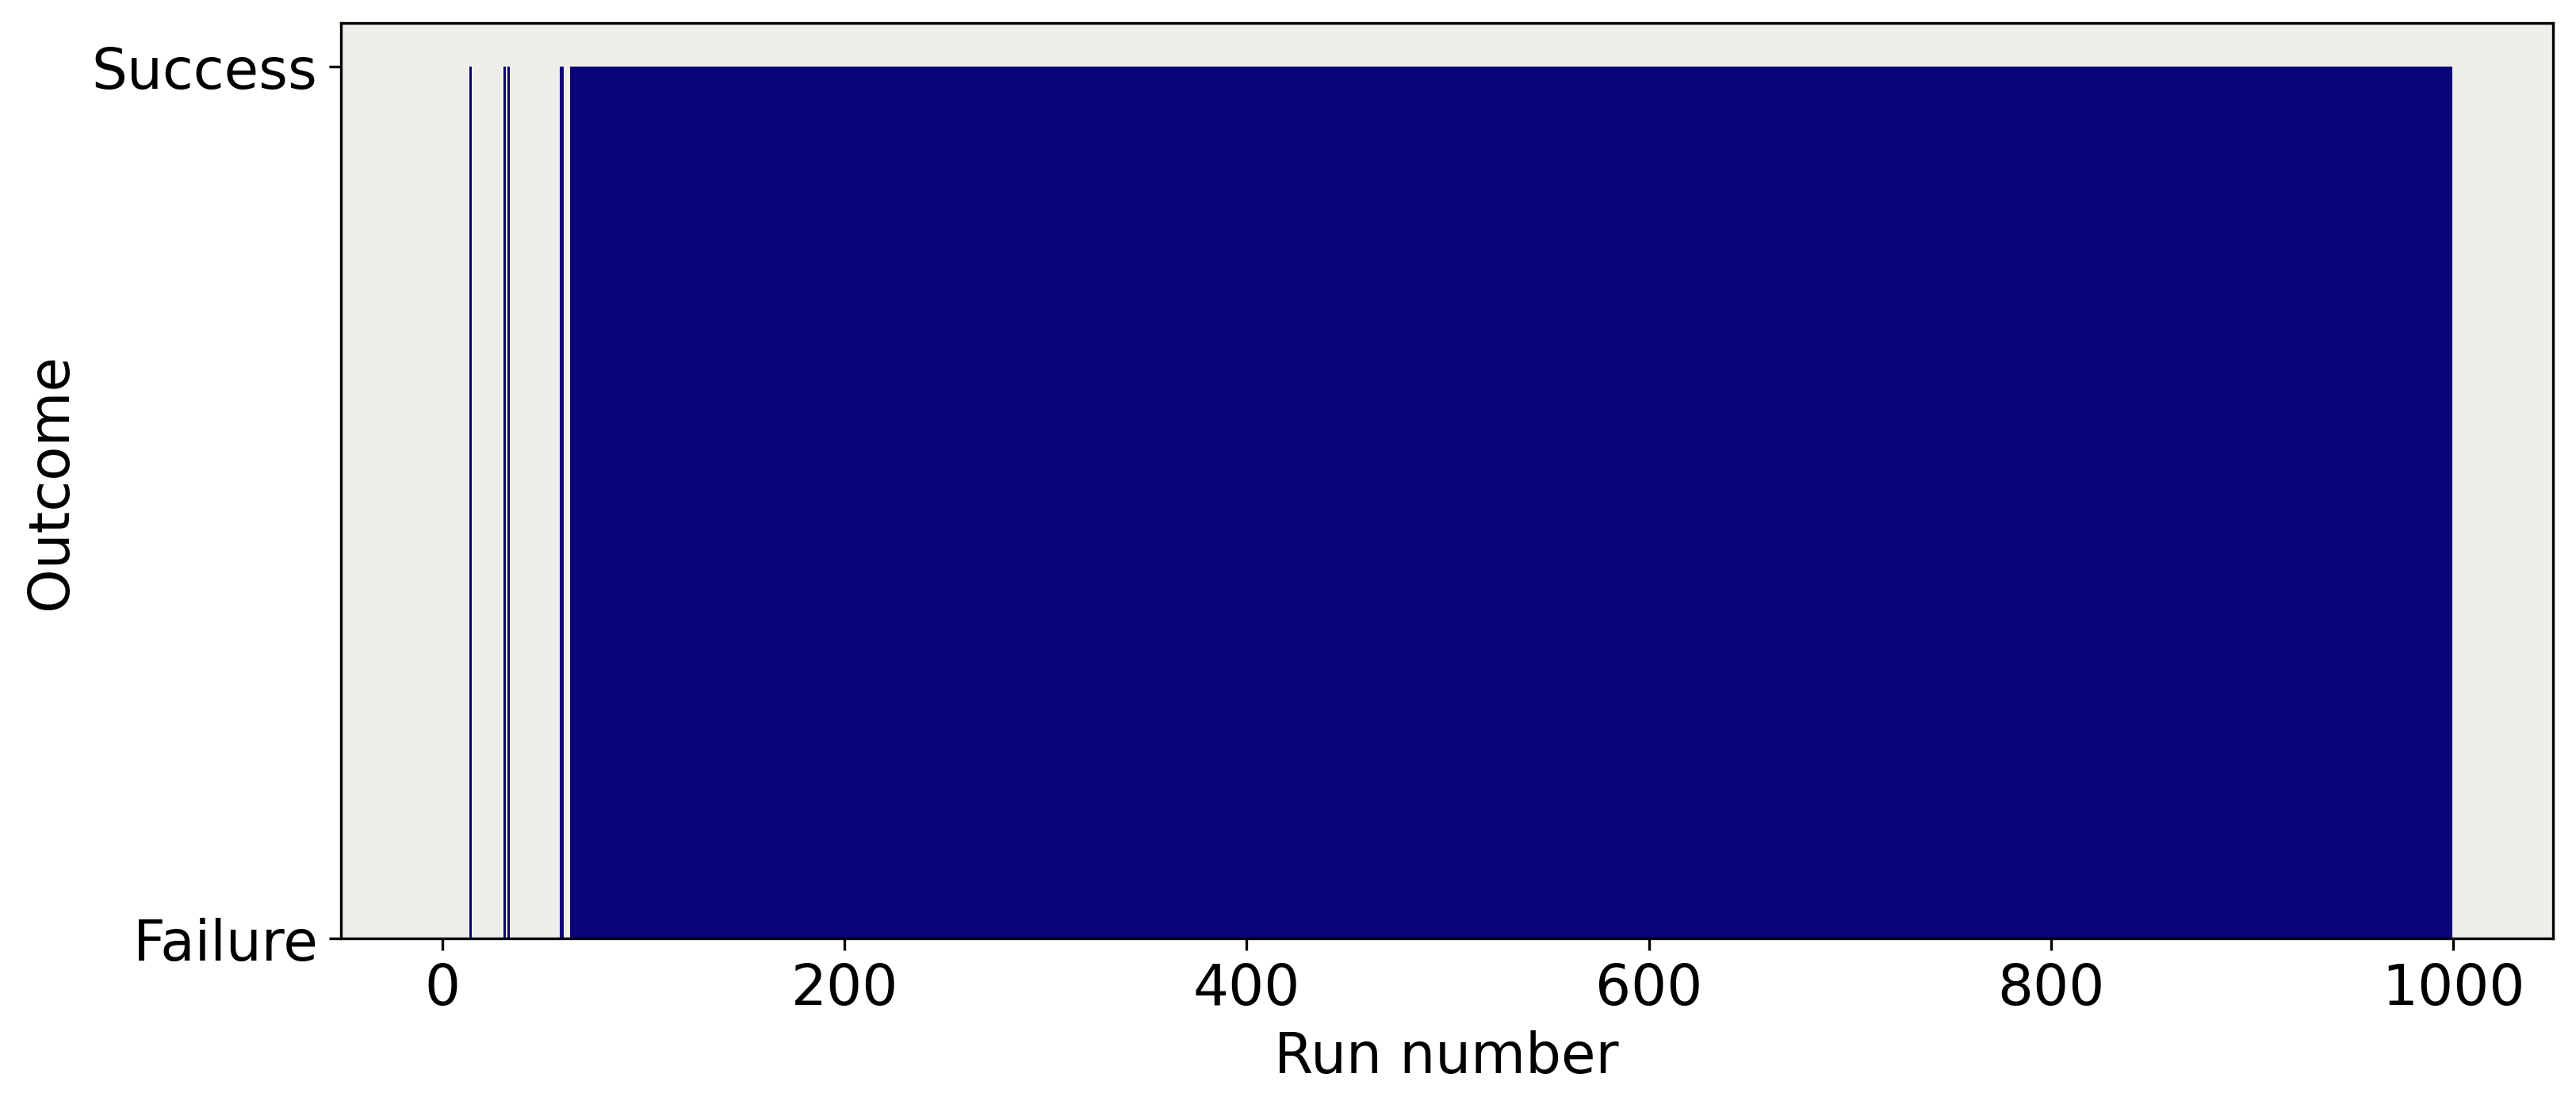

In [12]:
for _ in range(episodes):
    state = env.reset()[0]
    done = False

    # Initialize our outcome variable, failure by default
    outcome = "Failure"

    # Done will be set to true if agent get stuck in a hole or reach goal
    while not done:
        if np.amax(qtable[state]) > 0: # If theres a better action e.g. if there not all equal to 0
            action = np.argmax(qtable[state]) # Action = the best ranked action for this state
        else: # Else, choose random
            action = env.action_space.sample()
        # Implement the action and get new env variables
        new_state, reward, done, truncated, info = env.step(action)
        # Update Q(s, a) -> The quality of the current action for the current state
        qtable[state][action] = qtable[state][action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state][action])
        # Set current state to new state value
        state = new_state
        # If reward, e.g if agent on goal, set outcome to "Success"
        if reward == 1:
            outcome = "Success"
    outcomes.append(outcome)

print(qtable)
### Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()



In [16]:
from IPython.display import clear_output
import time 

state = env.reset()[0]
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = env.action_space.sample()
    
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, truncated, info = env.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    print(env.render())
    time.sleep(1)

print(f"Sequence = {sequence}")

  (Right)
SFFF
FHFH
FFFH
HFFG

Sequence = [2, 2, 1, 1, 1, 2]
